In [1]:
import sys
import os 

os.environ["CONFIG_PATHS"] = "../../configs/small_model.yaml"
os.environ["CONFIG_OVERRIDES"] = 'game.moves_directory="../../data/moves_10"'
sys.path.append("../../src")

import matplotlib.pyplot as plt

from analysis import load_events, filter_events

In [2]:
events = load_events("../../data/2024-11-20_23-29-01-chickpea/logs_2024-11-21_09-31-26_735810.txt")

Start time: 1732174279.629088


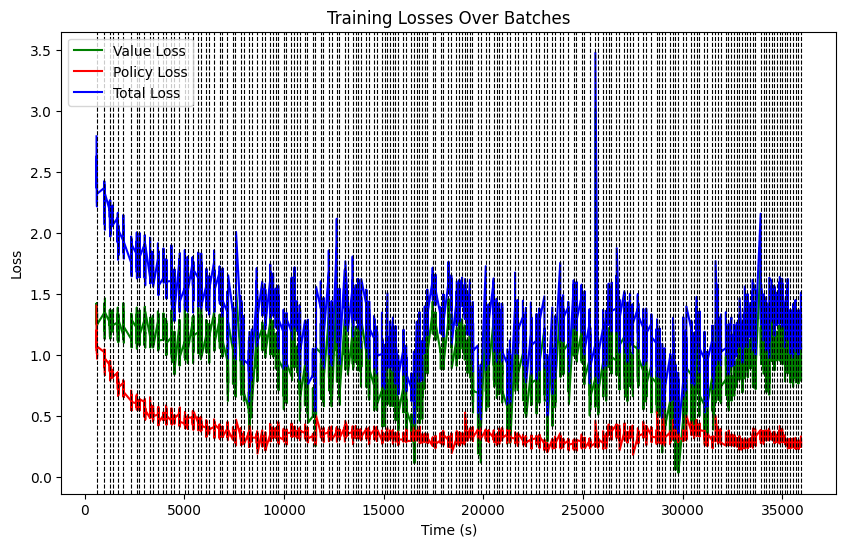

Number of training generations:  190


In [3]:
training_batches = filter_events(events, "training_batch")

timestamps = [e.timestamp for e in training_batches]
value_losses = [e[2]["value_loss"] for e in training_batches]
policy_losses = [e[2]["policy_loss"] for e in training_batches]
total_losses = [e[2]["loss"] for e in training_batches]

training_start_times = [e[0] for e in events if e[1] == "training_start"]

plt.figure(figsize=(10, 6))

plt.plot(timestamps, value_losses, label='Value Loss', color='g')
plt.plot(timestamps, policy_losses, label='Policy Loss', color='r')
plt.plot(timestamps, total_losses, label='Total Loss', color='b')

for start_time in training_start_times:
    plt.axvline(x=start_time, color='k', linestyle='--', linewidth=0.8)

plt.xlabel('Time (s)')
plt.ylabel('Loss')
plt.title('Training Losses Over Batches')
plt.legend()
plt.show()

print("Number of training generations: ", len(training_start_times))


The plot below shows the number of samples in each training run. If this value is growing over time, and the time between each training run is also growing, that's an indication that training is not able to keep up with the rate of self-play.

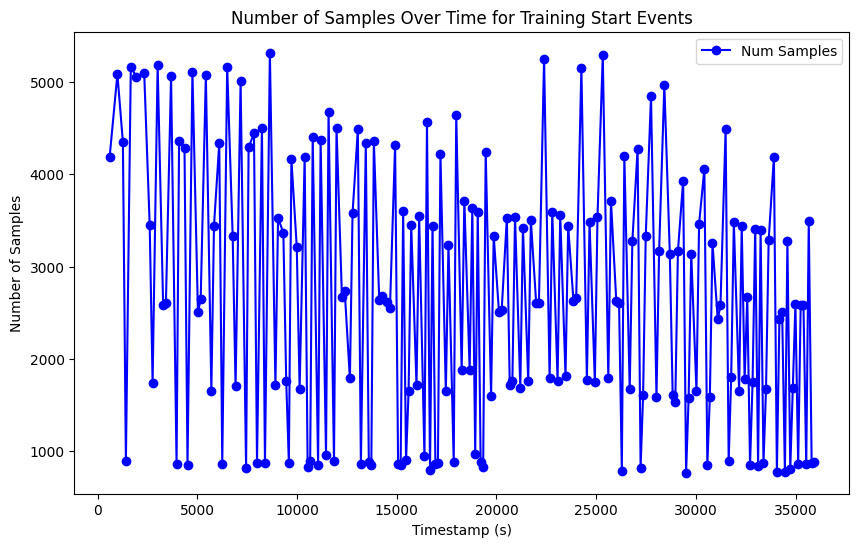

In [4]:
training_start_events = filter_events(events, "training_start")

num_samples = [e.params["num_samples"] for e in training_start_events]
timestamps = [e.timestamp for e in training_start_events]

plt.figure(figsize=(10, 6))
plt.plot(timestamps, num_samples, marker='o', linestyle='-', color='b', label='Num Samples')

plt.xlabel('Timestamp (s)')
plt.ylabel('Number of Samples')
plt.title('Number of Samples Over Time for Training Start Events')
plt.legend()
plt.show()

In [5]:
# Samples per trained network.
total_samples = 0
for event in training_start_events:
    total_samples += event.params["num_samples"]
    print(event.params["model_name"], "\t", total_samples)

2024-11-20_23-41-20_803404 	 4184
2024-11-20_23-47-49_952199 	 9265
2024-11-20_23-52-25_782321 	 13611
2024-11-20_23-54-56_110859 	 14503
2024-11-20_23-59-02_474807 	 19661
2024-11-21_00-03-39_243207 	 24716
2024-11-21_00-10-15_226238 	 29805
2024-11-21_00-14-50_607763 	 33249
2024-11-21_00-17-15_311324 	 34988
2024-11-21_00-21-27_803620 	 40163
2024-11-21_00-26-04_220154 	 42746
2024-11-21_00-28-22_969548 	 45348
2024-11-21_00-32-41_499885 	 50407
2024-11-21_00-37-17_427043 	 51270
2024-11-21_00-39-23_670468 	 55630
2024-11-21_00-43-55_424650 	 59910
2024-11-21_00-46-26_280655 	 60764
2024-11-21_00-50-32_735935 	 65868
2024-11-21_00-55-08_688409 	 68374
2024-11-21_00-57-27_091778 	 71019
2024-11-21_01-01-46_186997 	 76092
2024-11-21_01-06-22_455232 	 77746
2024-11-21_01-08-34_052974 	 81188
2024-11-21_01-12-58_546656 	 85522
2024-11-21_01-15-29_188873 	 86387
2024-11-21_01-19-35_467858 	 91548
2024-11-21_01-24-11_782129 	 94873
2024-11-21_01-26-35_688677 	 96576
2024-11-21_01-30-48_08